In [2]:
import pandas as pd
import numpy as np


Veri kümesini aşağıdaki komutla yükleyin.

In [7]:
cacao = pd.read_csv('flavors_of_cacao.csv')

In [8]:
cacao

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


Prosedür 1: Tanımlayıcı İstatistikler
Adım 1 - Çikolataların değerlendirmelerin ortalamasını, medyanını ve modunu bulalım.

In [10]:
#rating = değerlendirme
a = cacao['Rating'].mean()
a

3.185933147632312

In [11]:
b = cacao['Rating'].median()
b

3.25

In [12]:
c=float(cacao['Rating'].mode())
c

3.5


Adım 2 – Gerekli kitaplığı içe aktarın ve 'Rating' sütununun ortalamasını, medyanını ve modunu bir grafikte görselleştirin. Grafiğimizin normal dağılıma mı yoksa asimetrik dağılıma mı sahip olduğunu görmek için bunu yapıyoruz.

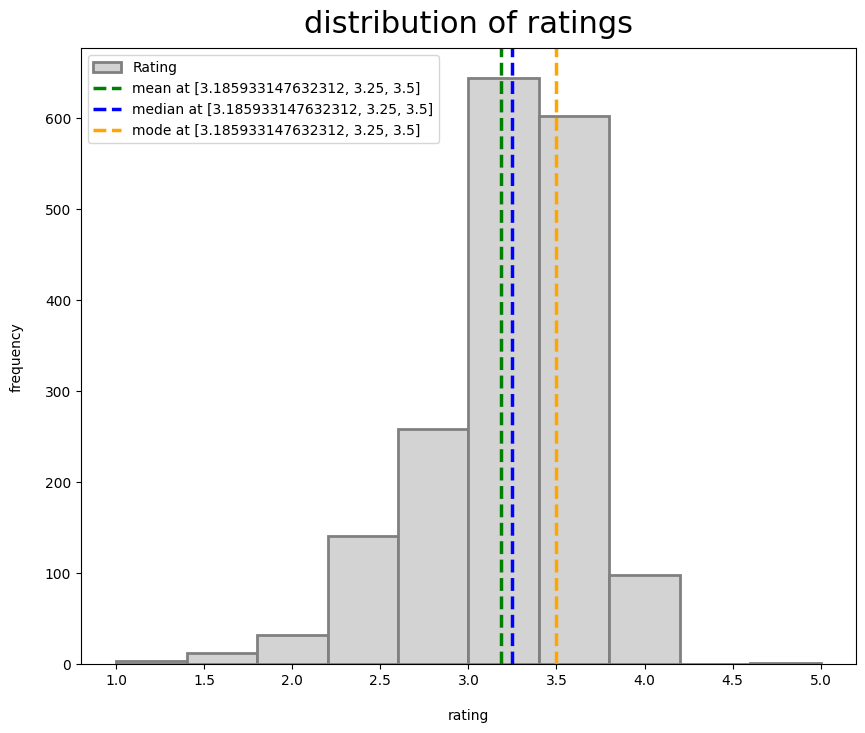

In [13]:
import matplotlib.pyplot as plt

cacao['Rating'].plot(kind='hist', figsize=(10,8), linewidth=2,color ='lightgray', edgecolor='gray')

plt.xlabel('rating', labelpad=15)
plt.ylabel('frequency', labelpad=15)
plt.title('distribution of ratings', y=1.012, fontsize=22)
measurements = [a,b,c]
names = ['mean', 'median', 'mode']
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements,names, colors):
  plt.axvline(x=measurement, linestyle='--',
              linewidth=2.5, label='{0} at {1}'.format(name, measurements), c=color)
plt.legend();

Sonuç olarak derecelendirmelerin dağılımı asimetrik, sola çarpık (negatif çarpıklık) bir grafiğe sahiptir.
Adım 3 – Kakao yüzdelerinin standart sapmasını bulun. Bunun için öncelikle ‘Cocoa\nPercent’ sütunundaki tüm elementlerin % sembolünü rstrip fonksiyonu ile kaldırmalıyız. Daha sonra CocoaPercent'teki tüm değerleri float olarak değiştiriyoruz.
(Not: Bu kodu iki kez çalıştırırsanız ikinci seferde hata alırsınız çünkü kakao yüzdeleri artık string değildir. Dolayısıyla hata önemli değil çünkü değerleri float'a dönüştürmek istedik ve bunu zaten yaptık.)

In [14]:
cacao['Cocoa\nPercent'] = cacao['Cocoa\nPercent'].str.rstrip('%').astype('float') / 100.0


In [15]:
print(cacao['Cocoa\nPercent'].std())

0.06323118338429189



Std. dev 0,06'dır ancak verileri daha iyi anlamak için ortalama ve varyansa da ihtiyacımız var.

In [16]:
print(cacao['Cocoa\nPercent'].mean())
print(cacao['Cocoa\nPercent'].var())

0.7169832869080781
0.00399818255217795


Yani kakao yüzdelerinin ortalaması %71, standart sapması ise %6'dır.


Adım 4 – Farklı ülkelerin kakao kullanım yüzdelerini bir grafik üzerinde görselleştirelim. Bunu yapmak için bazı ülke adlarına ihtiyacımız var. Bu nedenle ‘Company\nLocation’ sütununun benzersiz değerlerini Unique() fonksiyonu ile yazdırıyoruz.

In [17]:
print(cacao['Company\nLocation'].unique())

['France' 'U.S.A.' 'Fiji' 'Ecuador' 'Mexico' 'Switzerland' 'Netherlands'
 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'U.K.' 'Australia' 'Wales'
 'Belgium' 'Germany' 'Russia' 'Puerto Rico' 'Venezuela' 'Colombia' 'Japan'
 'New Zealand' 'Costa Rica' 'South Korea' 'Amsterdam' 'Scotland'
 'Martinique' 'Sao Tome' 'Argentina' 'Guatemala' 'South Africa' 'Bolivia'
 'St. Lucia' 'Portugal' 'Singapore' 'Denmark' 'Vietnam' 'Grenada' 'Israel'
 'India' 'Czech Republic' 'Domincan Republic' 'Finland' 'Madagascar'
 'Philippines' 'Sweden' 'Poland' 'Austria' 'Honduras' 'Nicaragua'
 'Lithuania' 'Niacragua' 'Chile' 'Ghana' 'Iceland' 'Eucador' 'Hungary'
 'Suriname' 'Ireland']


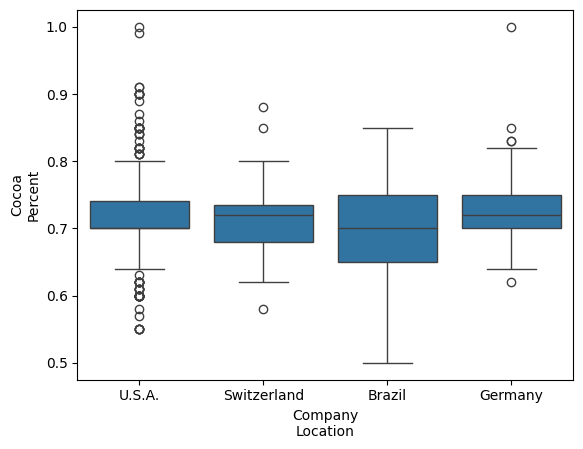

In [18]:
import seaborn as sns
cacao2 = cacao[(cacao['Company\nLocation']=='U.S.A.') | (cacao['Company\nLocation']=='Switzerland') |
               (cacao['Company\nLocation']=='Brazil') | (cacao['Company\nLocation']=='Germany') ]
ax = sns.boxplot(x='Company\nLocation', y='Cocoa\nPercent', data=cacao2)

ABD değerleri yaklaşık %72'ye göre toplanmıştır ancak çok sayıda aykırı değer vardır (siyah noktalar aykırı değerleri belirtir). Verilerinizde çok fazla aykırı değer varsa, aşırı uyum olabilir ve modeliniz verileri iyi bir şekilde genelleştiremez. Dolayısıyla bu durumda bazı aykırı değerleri silmelisiniz. Brezilya aykırı değerleri olmayan temiz bir veri.
Brezilya'nın medyan değeri %70 kakaodan oluşur, ilk çeyrek yaklaşık %65, üçüncü çeyrek yaklaşık %75, minimum %50, maksimum yaklaşık %85'tir.

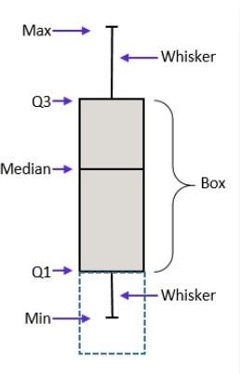

##Prosedür 2: Çıkarımsal İstatistik Örnekleme Yöntemleri
Bu adımda bazı örnekleme yöntemlerini uygulayacağız ve hangisinin verileri en iyi temsil ettiğine karar vereceğiz. Hangisinin daha iyi uyduğunu test etmek için önce tüm veri setinin derecelendirmelerinin ortalamasını alıyoruz, ardından farklı örneklerdeki derecelendirmelerin ortalamasını tekrar alıyoruz.

In [19]:
print(cacao['Rating'].mean())

3.185933147632312



Basit Rastgele Örnekleme
Birkaç örnekleme yöntemi vardır; örnek almanın en kolay yollarından biri Rastgele Örnekleme yöntemidir. Rastgele örnekleme gerçekleştirmek için rastgele kütüphaneyi içe aktarmamız gerekir.

In [20]:
from random import sample
ratings_to_list = list(cacao['Rating'])
sample_list=sample(ratings_to_list,317)
print(sample_list)

[3.5, 3.0, 3.5, 4.0, 3.25, 2.5, 2.75, 3.0, 2.75, 3.75, 3.75, 2.75, 3.25, 3.75, 4.0, 4.0, 3.25, 3.5, 3.0, 2.75, 4.0, 3.75, 4.0, 3.0, 3.0, 3.25, 3.25, 3.75, 2.75, 3.5, 3.0, 2.75, 3.0, 3.5, 4.0, 3.5, 3.25, 4.0, 3.5, 3.0, 3.75, 3.5, 3.0, 3.25, 3.25, 3.0, 3.25, 2.5, 3.5, 4.0, 2.75, 2.75, 3.25, 2.75, 3.25, 3.75, 3.25, 3.0, 2.75, 3.5, 2.75, 3.25, 3.0, 3.0, 2.75, 3.25, 3.5, 3.75, 2.75, 3.5, 3.75, 2.75, 3.25, 3.5, 3.25, 2.5, 3.0, 3.75, 2.75, 3.5, 3.25, 3.25, 3.0, 4.0, 3.0, 2.75, 3.25, 2.75, 3.0, 3.0, 4.0, 3.5, 3.75, 3.5, 2.75, 2.75, 3.0, 1.0, 3.0, 3.5, 3.75, 3.0, 3.0, 3.25, 3.25, 3.25, 3.75, 3.75, 2.0, 3.5, 3.5, 3.5, 3.75, 2.75, 3.25, 3.75, 3.25, 3.0, 3.5, 3.5, 2.75, 2.75, 3.0, 3.5, 2.5, 3.5, 3.25, 3.75, 2.75, 3.0, 3.75, 3.25, 3.0, 3.0, 3.0, 3.75, 3.25, 3.0, 3.25, 3.25, 3.25, 3.0, 2.75, 3.5, 3.0, 3.25, 3.5, 2.75, 3.5, 3.5, 3.0, 3.0, 3.0, 3.5, 3.75, 3.5, 3.75, 3.25, 3.25, 3.0, 3.25, 2.75, 3.75, 3.0, 2.75, 3.5, 3.75, 3.5, 2.75, 3.5, 2.5, 3.5, 3.0, 3.5, 3.25, 2.5, 2.0, 3.75, 2.75, 3.25, 2.75, 2.75


Örnek yöntem listelerle çalışır, bu nedenle derecelendirme değerlerini bir listeye dönüştürdük. Ne yazık ki listenin anlam() özelliği yok, dolayısıyla listedeki öğelerin ortalamasını alacak bir fonksiyon yazıyoruz.

In [21]:
def mean_function_list(list):
  sum =0
  for i in range(len(list)):
    sum+=list[i]
  mean=sum

 **Sistematik Örnekleme**

Sistematik örneklemede her n'inci elementi alırız. (örnek: n=5, çıktı: 5,10,15... vb.)

In [22]:
# sistematik örnekleme fonksiyonunu tanımlayın
def systmatic_sampling(df, step):
  indexes = np.arange(0,len(df),step=step)
  systamatic_sample = df.iloc[indexes]
  return(systamatic_sample)

# Sistematik bir örnek elde edin ve onu yeni bir değişkene kaydedin
systematic_sample = systmatic_sampling(cacao, 5)

# örneklenmiş veri çerçevesini görüntüle
systematic_sample

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
5,A. Morin,Carenero,1315,2014,0.70,France,2.75,Criollo,Venezuela
10,A. Morin,Panama,1011,2013,0.70,France,2.75,,Panama
15,A. Morin,Birmanie,1015,2013,0.70,France,3.00,,Burma
20,A. Morin,Chanchamayo Province,1019,2013,0.63,France,4.00,,Peru
...,...,...,...,...,...,...,...,...,...
1770,Zart Pralinen,"Kakao Kamili, Kilombero Valley",1824,2016,0.85,Austria,3.00,"Criollo, Trinitario",Tanzania
1775,Zokoko,Alto Beni,697,2011,0.68,Australia,3.50,,Bolivia
1780,Zotter,Amazonas Frucht,801,2012,0.65,Austria,3.50,,
1785,Zotter,Huiwani Coop,879,2012,0.75,Austria,3.00,"Criollo, Trinitario",Papua New Guinea


In [23]:
systematic_sample['Rating'].mean()

3.176183844011142

**Küme örneklemesi**

Küme örneklemede veri setini alt gruplara ayırıp bu grupları numaralarla adlandırırız ve
her T seferinde bir alt grup seçin.

In [24]:
def cluster_sampling(df, number_of_clusters):
  try:
    # birimleri eşit büyüklükte kümelere bölün
    df['cluster_id'] = np.repeat([range(1,number_of_clusters + 1 )], len(df)/ number_of_clusters)

    # boş bir liste oluştur
    indexes = []

    for i in range(0,len(df)):
      if df['cluster_id'].iloc[i] % 2 == 0:
        indexes.append(i)
    cluster_sample = df.iloc[indexes]
    return(cluster_sample)
  except:
    print("Popülasyon eşit büyüklükteki kümelere bölünemez")

# bir küme örneği elde edin, bunu yeni bir değişkene kaydedin
cluster_sample = cluster_sampling(cacao,5)

print(cluster_sample["Rating"].mean())
cluster_sample

3.1639972144846795


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin,cluster_id
359,Castronovo,"Duarte, Batch 360",1570,2015,0.70,U.S.A.,3.75,"Criollo, Trinitario",Domincan Republic,2
360,Castronovo,"Piaroa, Amazonas, Batch 350",1574,2015,0.72,U.S.A.,3.50,,Venezuela,2
361,Castronovo,Sierra Nevada,1347,2014,0.72,U.S.A.,3.50,"Criollo, Trinitario",Colombia,2
362,Castronovo,Arauca,1371,2014,0.76,U.S.A.,3.50,"Criollo, Trinitario",Colombia,2
363,Castronovo,Elvesia P.,1407,2014,0.70,U.S.A.,2.75,Trinitario,Dominican Republic,2
...,...,...,...,...,...,...,...,...,...,...
1431,Scharffen Berger,Tome Acu,336,2009,0.68,U.S.A.,3.75,,Brazil,4
1432,Scharffen Berger,Asante,336,2009,0.65,U.S.A.,4.00,Forastero,Ghana,4
1433,Scharffen Berger,Ben Tre,445,2009,0.72,U.S.A.,3.75,Trinitario,Vietnam,4
1434,Scharffen Berger,Finisterra,227,2008,0.72,U.S.A.,3.00,Blend,"Ven., Trinidad, Mad.",4


**Tabakalı Rastgele Örnekleme**


Tabakalı rastgele örnekleme yöntemi, popülasyonu alt gruplara (yani tabakalara) böler ve seçer.
Her birimin aynı seçilme olasılığına sahip olduğu rastgele örnekler.

Öncelikle Ratinglerimizi yüzdelerine göre katmanlara ayırıyoruz. İlk önce %25’i kontrol ediyoruz,
Açıklama yöntemiyle derecelendirmelerin %50, %75'i.

In [26]:
cacao.describe()

,REF,Review\nDate,Cocoa\nPercent,Rating,cluster_id
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,0.716983,3.185933,3.000000
std,552.886365,2.927210,0.063231,0.478062,1.414608
min,5.000000,2006.000000,0.420000,1.000000,1.000000
25%,576.000000,2010.000000,0.700000,2.875000,2.000000
50%,1069.000000,2013.000000,0.700000,3.250000,3.000000
75%,1502.000000,2015.000000,0.750000,3.500000,4.000000
max,1952.000000,2017.000000,1.000000,5.000000,5.000000


Daha sonra RatingPercent adında yeni bir sütun oluşturuyoruz ve %0-25, %25-50, %50-75 ve %75-100'ü temsil ediyoruz.
Gruplardaki yüzdeler sırasıyla 0,1,2,3.

In [27]:
cacao.loc[(cacao['Rating'] > 0) & (cacao['Rating'] <= 2.875), 'RatingPercent'] = 0
cacao.loc[(cacao['Rating'] > 2.875) & (cacao['Rating'] <= 3.250), 'RatingPercent'] = 1
cacao.loc[(cacao['Rating'] > 3.250) & (cacao['Rating'] <= 3.5), 'RatingPercent'] = 2
cacao.loc[(cacao['Rating'] > 3.5) & (cacao['Rating'] <= 5.0), 'RatingPercent'] = 3

Daha sonra her katmanın oranını gösteririz.

In [28]:
(cacao['RatingPercent'].value_counts()) / len(cacao) * 100

1.0    35.877437
0.0    25.013928
2.0    21.838440
3.0    17.270195
Name: RatingPercent, dtype: float64

Bu tabakaların oranlarına göre (Orantılı Örnekleme) numune almamız gerekiyor. Yani gruplandırıyoruz
Verilerimizi derecelendirme yüzdelerine (RatingPercent) göre belirliyor ve her grubun %10'unu örnek olarak alıyoruz. Kakao2
veri kümesi katmanlı örneklerimizi saklar.

In [29]:
cacao2 = cacao.groupby('RatingPercent', group_keys= False).apply(lambda x: x.sample(frac=0.1))
cacao2['RatingPercent'].value_counts()

1.0    64
0.0    45
2.0    39
3.0    31
Name: RatingPercent, dtype: int64